Derek Yadgaroff

Assignment 3, Exercise 1

21VT-2DV516

### Imports

In [2]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import plt_functions as pltf
import a3_funcs as as3f


### Load Data

In [1]:
data = np.loadtxt('./data/mnistsub.csv',delimiter=',')
X = data[:, 0:-1]
y = data[:, -1]

In [15]:
def analyze_gscv(gscv):
    # Get the classifier object
    clf = gscv.best_estimator_
    
    # Separate vectors
    X1 = X_train[clf.support_, 0]
    X2 = X_train[clf.support_, 1]
    
    # Meshgrid
    xx, yy = pltf.get_meshgrid(X1, X2)
    
    # plot boundary and data points for Train set
    fig = plt.figure()
    title = "Ex 1 - TRAIN accuracy "+str(round(abs(gscv.best_score_),5))+" "
    for key in gscv.best_params_:
        title = title+key+":"+str(gscv.best_params_[key])+" "
    fig.suptitle(title)
    ax = fig.add_subplot(1, 1, 1)
    pltf.add_countour(ax, xx, yy, clf, colors='r',linewidths=0.2)
    ax.scatter(X_train[:,0], X_train[:,1], s=.5,c=y_train)
    plt.show()
    
    # plot boundary and data points for Test set
    test_accuracy = str(round(abs(clf.score(X_test, y_test)),5))
    gscv_list.append({"gscv":gscv,"test accuracy":test_accuracy})
    kernel = str(gscv.best_params_["kernel"])
    fig = plt.figure()
    title = "Ex 1- TEST kernel: " + kernel + ", accuracy: " + test_accuracy+" "
    fig.suptitle(title)
    ax = fig.add_subplot(1, 1, 1)
    pltf.add_countour(ax, xx, yy, clf, colors='r',linewidths=0.2)
    ax.scatter(X_test[:,0], X_test[:,1], s=.5,c=y_test)
    plt.show()

### Exercise 1

grid_search_SVC {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]}
0.8023252952755906,{'C': 100, 'kernel': 'linear'}


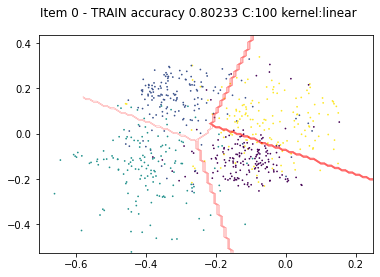

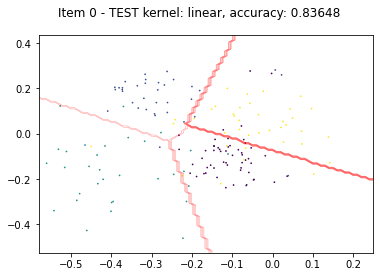

grid_search_SVC {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 1, 10, 100, 1000]}
0.8132750984251969,{'C': 1, 'gamma': 100, 'kernel': 'rbf'}


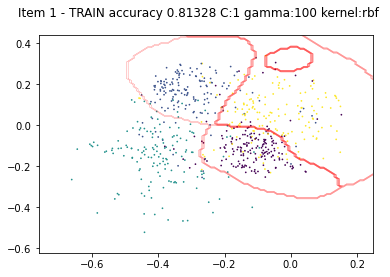

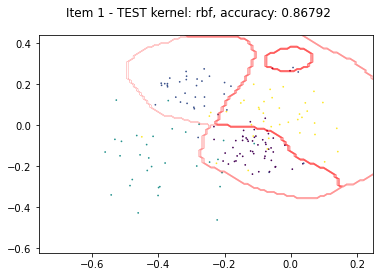

grid_search_SVC {'kernel': ['poly'], 'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4, 5, 6]}
0.7740403543307086,{'C': 100, 'degree': 3, 'kernel': 'poly'}


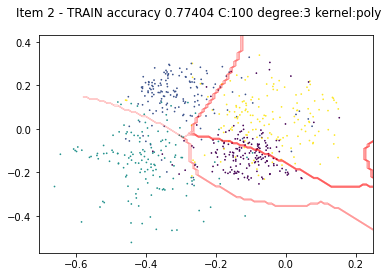

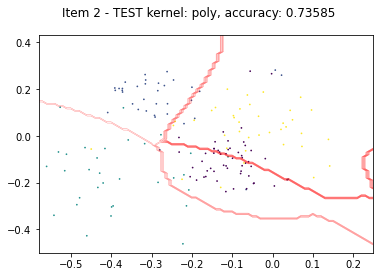

In [31]:
X = as3f.normalize_mnist_data(X)
X, y, X_train, y_train, X_test, y_test = as3f.randomize_and_split_data(X, y)

# Hypertuning values of C and gamma
test_params = [.1,1,10,100,1000]

# Setup each model
svc_params = [{'kernel':['linear'],'C':test_params},
              {'kernel':['rbf'], 'C':test_params,'gamma':test_params},
              {'kernel':['poly'], 'C':test_params,'degree':[2,3,4,5,6]}]

gscv_list = []
# Loop through each model
for index, svc_param in enumerate(svc_params):
    # CV and Regression using Grid Search Cross Validation
    gscv = as3f.grid_search_SVC(X_train, y_train, SVC, 5, svc_param)
    

    # Get the classifier object
    clf = gscv.best_estimator_
    
    # Separate vectors
    X1 = X_train[clf.support_, 0]
    X2 = X_train[clf.support_, 1]
    
    # Meshgrid
    xx, yy = pltf.get_meshgrid(X1, X2)
    
    # plot boundary and data points for Train set
    fig = plt.figure()
    title = "Item " + str(index) + " - TRAIN accuracy "+str(round(abs(gscv.best_score_),5))+" "
    for key in gscv.best_params_:
        title = title+key+":"+str(gscv.best_params_[key])+" "
    fig.suptitle(title)
    ax = fig.add_subplot(1, 1, 1)
    pltf.add_countour(ax, xx, yy, clf, colors='r',linewidths=0.2)
    ax.scatter(X_train[:,0], X_train[:,1], s=.5,c=y_train)
    plt.show()
    
    # plot boundary and data points for Test set
    test_accuracy = str(round(abs(clf.score(X_test, y_test)),5))
    gscv_list.append({"index":index,"gscv":gscv,"test accuracy":test_accuracy})
    kernel = str(gscv.best_params_["kernel"])
    fig = plt.figure()
    title = "Item " + str(index) + " - TEST kernel: " + kernel + ", accuracy: " + test_accuracy+" "
    fig.suptitle(title)
    ax = fig.add_subplot(1, 1, 1)
    pltf.add_countour(ax, xx, yy, clf, colors='r',linewidths=0.2)
    ax.scatter(X_test[:,0], X_test[:,1], s=.5,c=y_test)
    plt.show()

In [30]:
gscv_list.append({"gscv":gscv,"test accuracy":test_accuracy})
best_gscv = max(gscv_list, key=lambda x:x['test accuracy'])
gscv = best_gscv["gscv"]
print(f"The best parameters are from Ttem {best_gscv['index']}")
for key in gscv.best_params_:
    print(key+":"+str(gscv.best_params_[key])+" ")
print("test accuracy",str(round(abs(gscv.best_estimator_.score(X_test, y_test)),5)))

The best parameters are from item 1
C:1 
gamma:100 
kernel:rbf 
test accuracy 0.80503
